In [ ]:
# https://wikidocs.net/87222
# 이항분류에서는 미리 자료값을 같은 범위로 만드는
# 스케일링을 진행하고 작업하는것을 권장함.
# https://m.blog.naver.com/gdpresent/221703566189 (옵션)
# 구글링: 로지스틱 회귀분석 c값


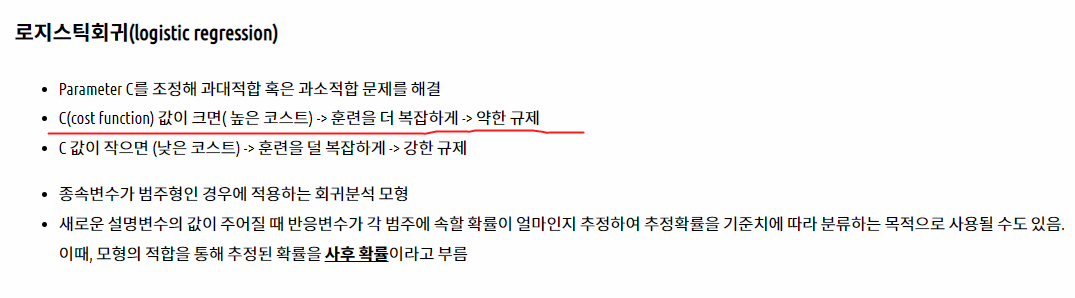

In [1]:
# 메모리내 변수 제거

all = [var for var in globals() if var[0] != "_"]   # globals() 목록의 첫글자가 _ 로 시작하지 않는 자료의 리스트만 가져와서
for var in all:
    del globals()[var]    # _로 시작하지 않는 모든 자료 삭제함

In [97]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

##########데이터 로드

x_data = np.array([
    [2, 1],
    [3, 2],
    [3, 4],
    [5, 5],
    [7, 5],
    [2, 5],
    [8, 9],
    [9, 10],
    [6, 12],
    [9, 2],
    [6, 10],
    [2, 4]
])
y_data = np.array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0])
labels = ['fail', 'pass']

##########데이터 분석

##########데이터 전처리

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                                    test_size=0.8, random_state=777, stratify=y_data)

##########모델 학습
model = LogisticRegression(max_iter=9)  # 시그모이드함수로 제작됨
model.fit(x_train, y_train)

##########모델 검증
y_predict = model.predict(x_test)

print('---테스트-예측값--- ')
print(y_predict)  # 
print('\n--테스트-실제값--- ')
print(y_test)  # 
print('\n--테스트데이터 정확도--- ')
print(accuracy_score(y_test, y_predict)) #1.0 #정확도


---테스트-예측값--- 
[1 1 1 1 1 0 0 0 0 0]

--테스트-실제값--- 
[1 1 1 1 1 1 0 0 0 0]

--테스트데이터 정확도--- 
0.9


C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [92]:
print(model.predict_proba(x_test))
print(model.predict(x_test))

[[0.01175422 0.98824578]
 [0.0209265  0.9790735 ]
 [0.32486271 0.67513729]
 [0.04234477 0.95765523]
 [0.40506439 0.59493561]
 [0.64142688 0.35857312]
 [0.83519214 0.16480786]
 [0.53401048 0.46598952]
 [0.66588827 0.33411173]
 [0.62623379 0.37376621]]
[1 1 1 1 1 0 0 0 0 0]


### [이항분류의 평가분류지표] 혼합행렬, 혼돈행렬
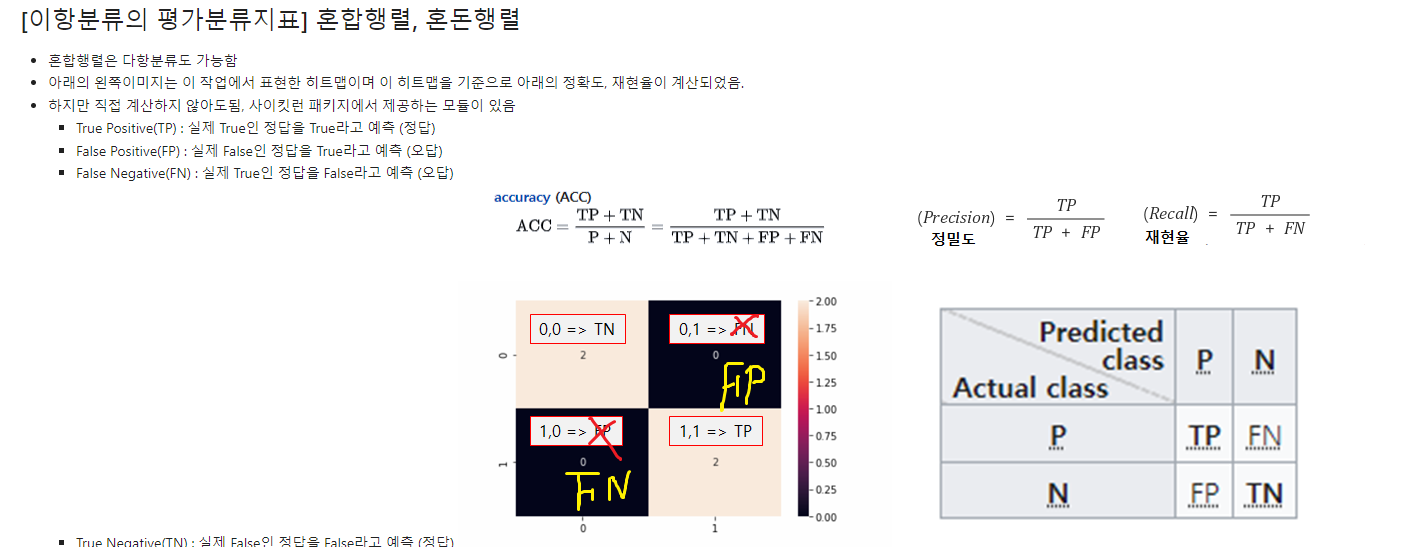

In [98]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict )
print(cm)

[[4 0]
 [1 5]]


In [103]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict )
print(cm)

TN=cm[0][0] # TN: 00: 실제y값이0인데 모델에 넣은 예측값이 0인경우의 수가 4개
FP=cm[0][1] # FP: 01: 실제y값이0인데 모델에 넣은 예측값이 1인경우의 수가 0개
FN=cm[1][0] # FN:10: 실제y값이1인데 모델에 넣은 예측값이 0인경우의 수가 1개
TP=cm[1][1] # TT:11: 실제y값이1인데 모델에 넣은 예측값이 1인경우의 수가 5개

print(TN,FP,FN,TP)
# 정밀도  TP / (TP+FP)      실제값이1이고예측값도1인경우/ 예측값이 1인 경우의 수를 확인하는것 
Precision=TP/(TP+FP)
Precision


[[4 0]
 [1 5]]
4 0 1 5


1.0

In [99]:
## 정확도:  0->0, 1->1 로 실제와예측데이터같은갯수/전체갯수
##          TN+TP / (TN+TP+FN+FP)
## TN: 0->0 
## TP: 1->1 
## FN:0인데 1로 예측함    
## FP: 1인데 0으로 예측함

import pandas as pd
ytest_pred=model.predict(x_test)
df=pd.DataFrame({'y':y_test,'y_pred':ytest_pred})

bigo=[]
for i,j in zip(df['y'],df['y_pred']):
    if i==1:
        if j==1:
            bigo.append('TP')
        else:
            bigo.append('FP')
    else:
        if j==0:
            bigo.append('TN')
        else:
            bigo.append('FN')
df['bigo']=bigo
print(df)


df['bigo'].value_counts()

   y  y_pred bigo
0  1       1   TP
1  1       1   TP
2  1       1   TP
3  1       1   TP
4  1       1   TP
5  1       0   FP
6  0       0   TN
7  0       0   TN
8  0       0   TN
9  0       0   TN


TP    5
TN    4
FP    1
Name: bigo, dtype: int64

In [ ]:
# https://jennainsight.tistory.com/entry/%EC%A0%95%EB%B0%80%EB%8F%84precision%EC%99%80-%EC%9E%AC%ED%98%84%EC%9C%A8recall%EC%9D%98-%EC%98%A4%EC%B0%A8%ED%96%89%EB%A0%AC-%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8-%ED%8F%89%EA%B0%80%EC%A7%80%ED%91%9C
# https://junklee.tistory.com/6

### [F1 스코어등에 대한 이해, 아래 사이트의 38페이지 부터]
- https://books.google.co.kr/books?id=jxfpDwAAQBAJ&pg=PA41&lpg=PA41&dq=f1+%EA%B0%80%EC%A4%91%EC%B9%98%ED%8F%89%EA%B7%A0&source=bl&ots=zAdfB1s-xL&sig=ACfU3U2dPsQNKHuSshzF4ONORFDsLZmEDQ&hl=ko&sa=X&ved=2ahUKEwjBp4-I0LLzAhWPxYsBHYo5ANAQ6AF6BAgdEAM#v=onepage&q=f1%20%EA%B0%80%EC%A4%91%EC%B9%98%ED%8F%89%EA%B7%A0&f=false

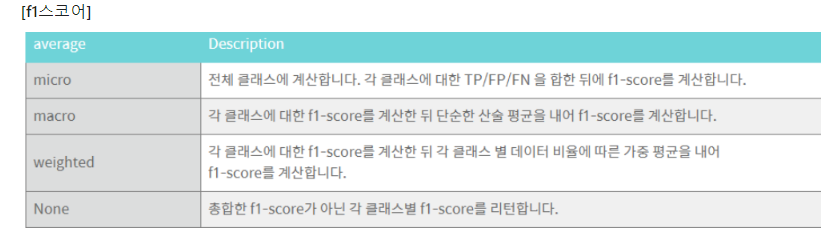

- 클래스 불균형(Imbalance) 문제가 있는 데이터셋에서는 Micro-average가 조금 더 효과적인 평가지표가 됨.
- Macro 값은 0.4로 정밀도의 평균에 더 가깝고, Micro 값은 0.123으로, 많이 관측된 클래스의 정밀도에 가까우며 Micro 는 샘플의 수에 영향을 받아서 클래스별 샘플 수를 고려한 Micro가 불균형 데이터셋에 있어 좋음

In [104]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.83      0.91         6

    accuracy                           0.90        10
   macro avg       0.90      0.92      0.90        10
weighted avg       0.92      0.90      0.90        10



In [10]:
from sklearn.metrics import f1_score

print('f1 score / micro: %0.3f'%f1_score(y_test,y_predict,average='micro'))
print('f1 score / macro: %0.3f'%f1_score(y_test,y_predict,average='macro'))
print('f1 score / weighted: %0.3f'%f1_score(y_test,y_predict,average='weighted'))
print(f1_score(y_test,y_predict,average=None))   # 혼돈행렬의 0, 1, 2 값의 f1-score임

f1 score / micro: 1.000
f1 score / macro: 1.000
f1 score / weighted: 1.000
[1. 1.]


### 모형적합도

In [ ]:
!pip install statsmodels

In [105]:
# https://wikidocs.net/87222
import statsmodels.api as sm
logit_mod = sm.Logit(y_train, x_train)
results = logit_mod.fit()
results.summary()

PerfectSeparationError: Perfect separation detected, results not available

## ROC커브곡선
- 구글링 해보세요
- https://m.blog.naver.com/sharp_kiss/221599009671
- 이항분류에서 일치율을 시각화함. 이때 ROC의 하단면적을 AUC라고 함. AUC가 클수록 좋은 결과임.


In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# y값: admit: 합격1, 불합격 0

# x값:
# gre: 점수, gpa:학점평균
# prestige: 출신학교(1이 가장 좋은 학교, 4가 가장 않좋은 학교)
# 출신학교의 1,2,3,4는 일종의 카테고리(그룹항목)
# 이러한 그룹항목은 범주형자료임=>더미변수화를 작업해야함. 
# (일부에서는 이 작업을 원핫인코딩이라고 하기도함)

df = pd.read_csv("admissions.csv")
df.head()

admit  gre   gpa  prestige
0      0  380  3.61         3
1      1  660  3.67         3
2      1  800  4.00         1
3      1  640  3.19         4
4      0  520  2.93         4

In [6]:
df[['pre_1','pre_2','pre_3','pre_4']]=pd.get_dummies(df['prestige'])
df.head()

admit  gre   gpa  prestige  pre_1  pre_2  pre_3  pre_4
0      0  380  3.61         3      0      0      1      0
1      1  660  3.67         3      0      0      1      0
2      1  800  4.00         1      1      0      0      0
3      1  640  3.19         4      0      0      0      1
4      0  520  2.93         4      0      0      0      1

In [41]:
y=df['admit']
x=df[['gre','gpa','pre_1','pre_2','pre_3','pre_4']]

from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import accuracy_score

model=LogisticRegression(C=100,max_iter=500)
model.fit(x,y)
y_preds=model.predict(x)
print(accuracy_score(y, y_preds)) #1.0 #정확도

0.7103274559193955


In [20]:
tmp=model.predict_proba(x)

cnt=0; errindex=[]
for i, j in zip(y,y_preds):
    if i==1 and j==0:
        errindex.append(cnt)
    cnt+=1
tmp[errindex][:5]

array([[0.71088418, 0.28911582],
       [0.80190455, 0.19809545],
       [0.61526575, 0.38473425],
       [0.56616726, 0.43383274],
       [0.79027542, 0.20972458]])

[[252  19]
 [ 96  30]]


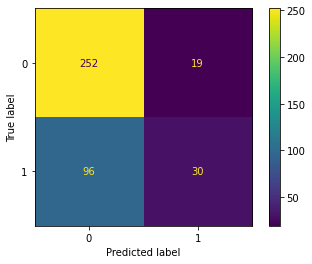

In [42]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y, y_preds)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y, y_preds))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       271
           1       0.61      0.24      0.34       126

    accuracy                           0.71       397
   macro avg       0.67      0.58      0.58       397
weighted avg       0.69      0.71      0.66       397



In [56]:
# 최소제곱법할때 기본으로는 w(회귀계수)만 주고 b(절편)제공안함.
x['intercept']=1   # 상수항 추가방법론중 
xx=x[['intercept','gre','gpa','pre_2','pre_3','pre_4']]
import statsmodels.api as sm
logit_mod = sm.Logit(y, xx)
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


C:\Users\user\AppData\Local\Temp\ipykernel_6792\4005327598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['intercept']=1   # 상수항 추가방법론중


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Thu, 26 May 2022   Pseudo R-squ.:                 0.08166
Time:                        17:23:32   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
Covariance Type:            nonrobust   LLR p-value:                 1.176e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -3.8769      1.142     -3.393      0.001      -6.116      -1.638
gre            0.0022      0.001      2.028      0.043    7.44e-05       0.004
gpa            0.7793      0.333      2.344      0.019       0.128       1.431
pre_2         -0.6801      0.317     -2.146      0.032      -1.301      -0.059
pre_3         -1.3387      0.345     -3.882      0.000      -2.015      -0.663
pre_4         -1.5534      0.417     -3.721      0.000      -2.372      -0.735
==============================================================================
"""

In [57]:
np.exp(results.params)

# gpa라는 학점평균 2.18의 값의 의미하는것은
 # --> gpa가1 증가할때마다 합격확률이 2.1배증가함을 뜻함

# x값:
# gre: 점수, gpa:학점평균
# prestige: 출신학교(1이 가장 좋은 학교, 4가 가장 않좋은 학교)
# 출신학교의 1,2,3,4는 일종의 카테고리(그룹항목)
# 이러한 그룹항목은 범주형자료임=>더미변수화를 작업해야함. 
# (일부에서는 이 작업을 원핫인코딩이라고 하기도함)
# 카테고리컬 변수인  pre_2,_3,_4는 1대비하여서 2로 가면 합격률이 50%

intercept    0.020716
gre          1.002221
gpa          2.180027
pre_2        0.506548
pre_3        0.262192
pre_4        0.211525
dtype: float64